# Project Breast Cancer using ensemble learning models

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target

df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
186,18.31,18.58,118.6,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.1571,0.3206,0.06938,0


In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bagging with random forest

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9649122807017544


In [10]:
print(confusion_matrix(y_test, y_pred_rf))

[[40  3]
 [ 1 70]]


# Boosting with AdaBoost

In [13]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [14]:
y_pred_ada = ada_model.predict(X_test)
y_pred_ada

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [16]:
print(accuracy_score(y_test, y_pred_ada))

0.9736842105263158


In [17]:
print(confusion_matrix(y_test, y_pred_ada))

[[41  2]
 [ 1 70]]


# Gradient Boosting

In [18]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [20]:
print(accuracy_score(y_test, y_pred_gb))

0.956140350877193


In [21]:
print(confusion_matrix(y_test, y_pred_gb))

[[40  3]
 [ 2 69]]


In [26]:
model = ['RF', 'ADA', 'GB']

score = [accuracy_score(y_test, y_pred_rf),
         accuracy_score(y_test, y_pred_ada),
         accuracy_score(y_test, y_pred_gb)
        ]

model_per = dict(zip(model, score))

model_per_df = pd.DataFrame(model_per, index=[1])
model_per_df

,RF,ADA,GB
1,0.964912,0.973684,0.95614


<Axes: >

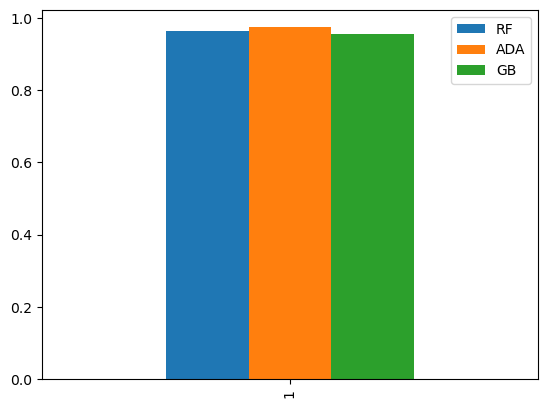

In [27]:
model_per_df.plot(kind='bar')